In [66]:
import matplotlib.pyplot as plt
import numpy as np

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

In [68]:
mu = 0
mu2 = 0.5
mu3 = 0.75

In [69]:
variance = 0.5
variance2 = 1
variance3 = 1.5

In [70]:
sigma = math.sqrt(variance)
sigma2 = math.sqrt(variance2)
sigma3 = math.sqrt(variance3)

In [71]:
x = np.linspace(mu-3*variance,mu+3*variance, 40)
x2 = np.linspace(mu2-3*variance2, mu+3*variance2, 40)
x3 = np.linspace(mu2-3*variance3, mu+3*variance3, 40)

In [72]:
A = np.zeros((559,1))
A[20:60] = mlab.normpdf(x, mu, sigma).reshape(40,1)
A[230:270] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
A[420:460] = mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
A = A.reshape(559)

In [73]:
B = np.zeros((559,1))
B[23:63] = mlab.normpdf(x, mu, sigma).reshape(40,1)
B[400:440] =  mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
B[470:510] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
B = B.reshape(559)


In [74]:
C = np.zeros((559, 1))
C[320:360] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
C[433:473] = mlab.normpdf(x, mu, sigma).reshape(40,1)
C[128:168] = mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
C = C.reshape(559)

In [75]:
spectralmatrix = np.zeros((256, 256, 559))
functionalmatrix = np.zeros((256, 256))
Amatrix = np.zeros((256, 256))
Bmatrix = np.zeros((256, 256))
Cmatrix =np.zeros((256, 256))
xaxis = spectralmatrix.shape[0]
yaxis = spectralmatrix.shape[1]

In [76]:
np.random.seed(122)
a=np.random.rand(1)
b=np.random.rand(1)
c=np.random.rand(1)
spatialfrequency = (2*np.pi)/64
for x in range(xaxis):
    for y in range(yaxis):
        a = abs(np.sin(y*spatialfrequency))
        b = abs(np.sin(x*spatialfrequency) + np.sin(y*spatialfrequency))
        c = np.sin(x*spatialfrequency)**2
    #can make a, b, c as a function of x and y with some random noise
        spectralmatrix[x,y,:] = a*A + b*B + c*C
        functionalmatrix[x][y] = 2*a + b + 9*c
        Amatrix[x][y]=a
        Bmatrix[x][y] = b
        Cmatrix[x][y] = c
        

In [77]:
#spectralmatrix[1,2,:]
functionalmatrix.shape

(256, 256)

In [78]:
functionalmatrix.shape

(256, 256)

In [79]:
256*256

65536

In [80]:
#LinearRegression
#model: Y = 2a+b+9c

pts=256
#a=Amatrix
#b=Bmatrix
#c=Cmatrix
B0=0
B1=2
B2=1
B3=9
yactual=B0+B1*a+B2*b+B3*c
np.random.seed(123)
#add noise scaled to 25% of range to data
yrand=yactual+.25*(yactual.max()-yactual.min())*np.random.normal(size=pts)

In [81]:
Amatrix.shape

(256, 256)

In [82]:
yrand.shape

(256,)

In [83]:
Bmatrix.shape

(256, 256)

In [84]:
yactual1=np.array(yactual)
#yrand1=np.array(yrand)
#yrand1.shape

In [88]:
from sklearn import linear_model
regr=linear_model.LinearRegression()#performing the simple linear regression
regr.fit([[a,b,c]],yrand1.reshape(1, len(yrand1)))#single dimension to the fit function, could just plot one point 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
#plt.plot(c,yactual1,color='red',lw='1')
#plt.scatter(c,yrand1,color='c', marker='^', alpha=0.01)
#plt.xlabel('peak locations')
#plt.ylabel('y values')
#plt.show()

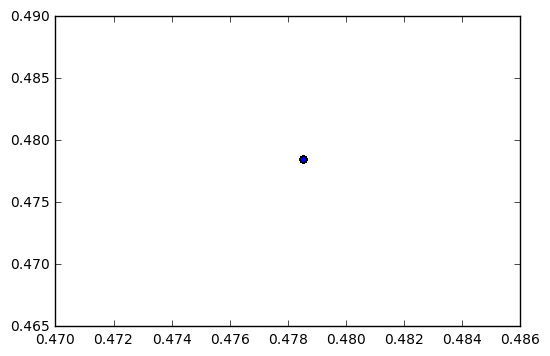

In [90]:
pred=regr.predict([[a,b,c]])
plt.scatter(yrand1,pred) 
plt.show()

Took a, b, c as a single value, one dimension input  to the fit function, could just plot one point, not much of use though!